In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

# load the data from the Thinkful PostgreSql database using our credentials.

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices_df = pd.read_sql_query('select * from houseprices',con=engine)
# no need for an open connection, as we're only doing a single query
engine.dispose()

Tasks:

Build a regression model where the target variable is temperature. 

As explanatory variables, use humidity, windspeed, windbearing, and pressure.

 Estimate the model using OLS.

Now, check if your model meets the Gauss-Markov Conditions above.

If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

In [0]:
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True).columns)

- Build a regression model where the target variable is temperature.

- As explanatory variables, use humidity, windspeed, windbearing, and pressure.

In [55]:
# define features with variable X as dataframe
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]


# define target variable y as series
y = house_prices_df['saleprice']

# this is our equation: Y = 1 + 2*X + 3*X^2
# temperature_df['y_eq'] = 1 +2*X+ 3*(X**2)

 # instantiate Linear Regression Model
lr = linear_model.LinearRegression()

# fit model, find coefficients 
lr.fit(X, y)

predictions = lr.predict(X)
errors = np.array(y) - predictions

# print coefficients
print('\nCoefficients: \n', lr.coef_)
print('\nIntercept: \n', lr.intercept_)




Coefficients: 
 [2.33265353e+04 4.56343565e+01 1.34501364e+04 1.64082048e+01
 2.83816393e+01 2.50875137e+04 1.34204564e+04 2.85658560e+04
 9.04778936e+03 1.51037622e+02]

Intercept: 
 -117337.72871399377


- Estimate the model using OLS

In [56]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm

X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     482.0
Date:                Sat, 25 Jan 2020   Prob (F-statistic):               0.00
Time:                        06:55:59   Log-Likelihood:                -17475.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1449   BIC:                         3.503e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.173e+05    1.8e+04     -6.502      0.000   -1.53e+05   -8.19e+04
overallqual  2.333e+04   1088.506     21.430      0.000    2.12e+04    2.55e+04
grlivarea      45.6344      2.468     18.494      0.000      40.794      50.475
garagecars   1.345e+04   2990.453      4.498      0.000    7584.056    1.93e+04
garagearea     16.4082     10.402      1.577      0.115      -3.997      36.813
totalbsmtsf    28.3816      2.931      9.684      0.000      22.633      34.131
mszoning_FV  2.509e+04   1.37e+04      1.833      0.067   -1761.679    5.19e+04
mszoning_RH  1.342e+04   1.58e+04      0.847      0.397   -1.77e+04    4.45e+04
mszoning_RL  2.857e+04   1.27e+04      2.246      0.025    3612.782    5.35e+04
mszoning_RM  9047.7894   1.29e+04      0.702      0.483   -1.62e+04    3.43e+04
street_Pave   151.0376   1.63e+04      0.009      0.993   -3.18e+04    3.21e+04
==============================================================================
Omnibus:                      415.883   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41281.526
Skew:                          -0.115   Prob(JB):                         0.00
Kurtosis:                      29.049   Cond. No.                     5.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
results.params # bc the coeffs are clearer here


const         -117337.728714
overallqual     23326.535281
grlivarea          45.634357
garagecars      13450.136390
garagearea         16.408205
totalbsmtsf        28.381639
mszoning_FV     25087.513736
mszoning_RH     13420.456402
mszoning_RL     28565.856024
mszoning_RM      9047.789356
street_Pave       151.037622
dtype: float64

- Now, check if your model meets the Gauss-Markov Conditions above.

    - If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

Gauss Markov assumptions (also called conditions):

- linearity of models in their coefficients
- the error term should be zero on average
- homoscedasticity
- low multicollinearity
- error terms should be uncorrelated with one another
- features shouldn't be correlated with the errors
normality of the errors

So...

The Gauss Markov theorem tells us that if a certain set of assumptions are met, **the ordinary least squares estimate for regression coefficients gives you the best linear unbiased estimate (BLUE) possible.** [Source](https://www.statisticshowto.datasciencecentral.com/gauss-markov-theorem-assumptions/)

See below, our errors are a very small number; making them near zero.  Thus, satisfying Exogeneity

In [9]:
print(" The Mean of the errors in the house prices model is: {}".format(np.mean(errors)))

 The Mean of the errors in the house prices model is: 4.592823655637976e-11


Plotting our predictions versus our errors, we see that our data are very heterscedastic (there's a pattern).  So our assumption of homoscedasticity is not met. 

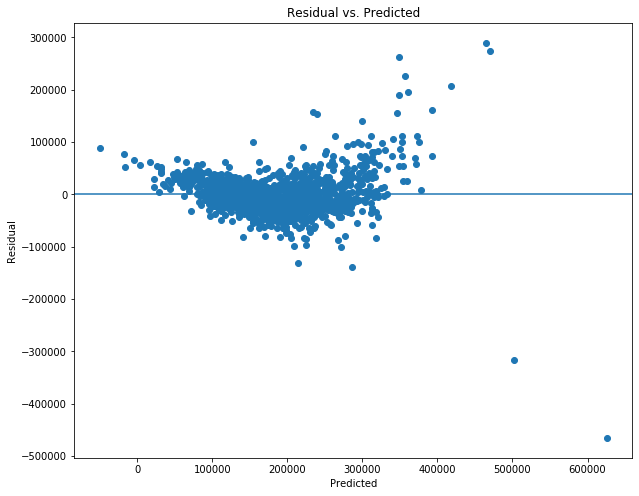

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

To confirm our observations, let's perform two statistical tests to determine if we reject our null hypothesis which is that the errors are homoscedastic. We will use the Bartlett and Levene tests from scipy.

In [13]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

z = 0.05
x = bart_stats[1]
y = lev_stats[1]
one = z < x
two = z < y
if one | two == False: print("reject the null!")
if one | two == True: print("Don't reject the null!"); 
# thumbs up for statement code tho ;)

Bartlett test statistic value is 497.754 and p value is 2.93e-110
Levene test statistic value is 491.982 and p value is 7.29e-101
reject the null!


Since both p-values from the statistical tests are below our threshold, we cannot meet the assumption of homoscedasticity, and thus, our parameter's accuracies are not reliable!

Next, let's check the assumption of low multicollinearity via a correlation matrix.

In [14]:
X.corr()

,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave
overallqual,1.000000,0.593007,0.600671,0.562022,0.537808,0.171854,-0.064666,0.126972,-0.195515,0.058823
grlivarea,0.593007,1.000000,0.467247,0.468997,0.454868,0.024275,-0.001070,0.132936,-0.154239,0.044121
garagecars,0.600671,0.467247,1.000000,0.882475,0.434585,0.102851,-0.090477,0.175167,-0.221834,-0.020025
garagearea,0.562022,0.468997,0.882475,1.000000,0.486665,0.114859,-0.073188,0.169593,-0.235580,-0.047794
totalbsmtsf,0.537808,0.454868,0.434585,0.486665,1.000000,-0.032689,-0.055128,0.257373,-0.247379,0.005068
mszoning_FV,0.171854,0.024275,0.102851,0.114859,-0.032689,1.000000,-0.022722,-0.416608,-0.090435,0.013866
mszoning_RH,-0.064666,-0.001070,-0.090477,-0.073188,-0.055128,-0.022722,1.000000,-0.203158,-0.044101,0.006762
mszoning_RL,0.126972,0.132936,0.175167,0.169593,0.257373,-0.416608,-0.203158,1.000000,-0.808585,0.045348
mszoning_RM,-0.195515,-0.154239,-0.221834,-0.235580,-0.247379,-0.090435,-0.044101,-0.808585,1.000000,-0.003127
street_Pave,0.058823,0.044121,-0.020025,-0.047794,0.005068,0.013866,0.006762,0.045348,-0.003127,1.000000


I just love heatmaps!  We have a lot of features, so this is usuallynot the best value add, but let's take a look at the first few columns--

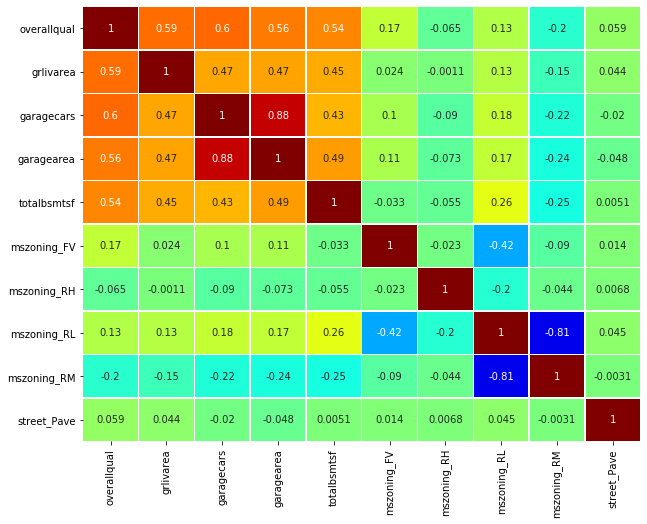

In [37]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, 
            vmin=-1, 
            vmax=1, 
            cmap='jet', linewidths=0.5, cbar=False); #just wanna experiment with cmap!

Yikes! We can see two vairables, _garagearea_ and _garagecars_ carry a correlation of 0.88! That's too close to one and our model will be impacted.  We can eleviate this by dropping these features.

#Next, let's confirm that the errors are uncorrelated with one another--

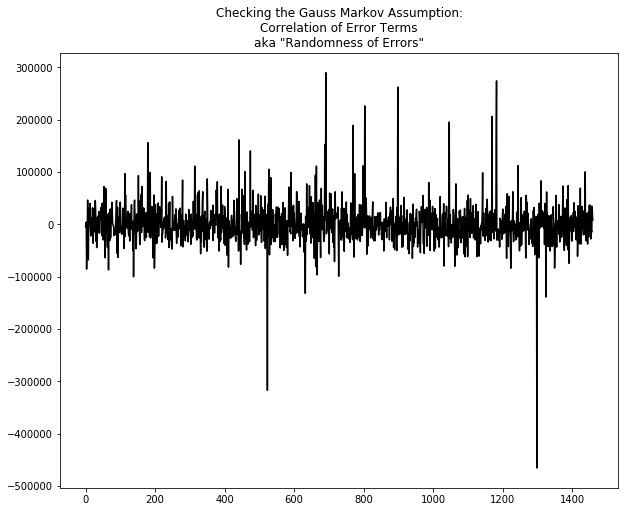

In [16]:
plt.figure(figsize=(10,8))
plt.plot(errors, color='black') # I just like the color cyan...
plt.title('Checking the Gauss Markov Assumption:\nCorrelation of Error Terms\naka "Randomness of Errors"')
plt.show()


Cool, we can confirm that the errors are random!  We can also check this using the statsmodel function: _autocorrelation function_

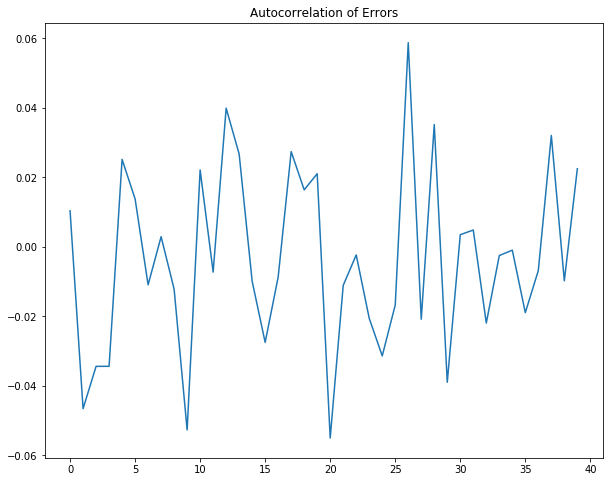

In [17]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.figure(figsize=(10,8))
plt.plot(acf_data[1:])
plt.title('Autocorrelation of Errors')
plt.show()

yahoo! the plot above confirms that the error terms are uncorrelated!

#Final assumption check: Features shouldn't be correlated with errors

In [28]:
df = pd.concat([X, pd.DataFrame(errors, columns=["error"])], axis=1)
df.corr().iloc[:,-1:].sort_values(by='error', ascending=False)

,error
error,1.000000e+00
garagearea,1.039714e-13
garagecars,8.672268e-14
overallqual,2.223140e-14
mszoning_FV,1.777718e-14
mszoning_RL,4.645042e-15
totalbsmtsf,-4.357652e-15
grlivarea,-6.551013e-15
mszoning_RH,-7.988449e-15
street_Pave,-1.058596e-14


Again, our correlation matrix tells us that the correlation between features and errors are very low. 

#Normality of the error terms (for the guild)

_normality of errors is not required to apply OLS to a linear regression model, but in order to measure the statistical significance of our estimated coefficients, error terms must be normally distributed_

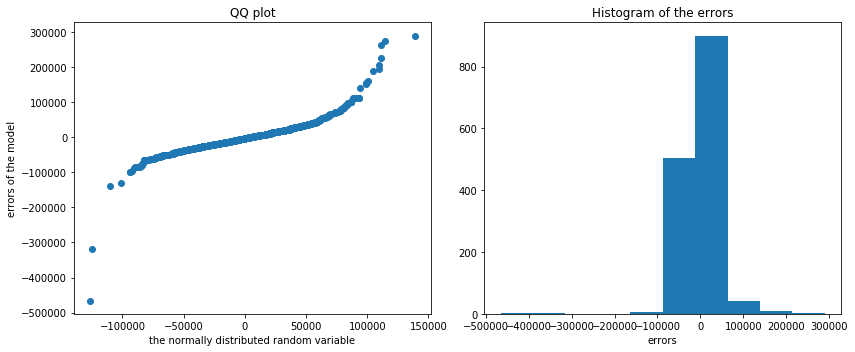

In [29]:
# informal way

rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()


_the QQ plot and the histogram imply that the distribution is not very far away from normal._

the statistical tests used to find out whether or not error terms are normal are the Jarque Bera and Normaltest from scipy

In [30]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

# let's use the leet code from before--
z = 0.05
x = jb_stats[1]
y = norm_stats[1]
one = z < x
two = z < y
if one | two == False: print("The errors are NOT normally distributed!")
if one | two == True: print("The errors ARE normally distributed!"); 
# thumbs up for statement code tho ;)

Jarque-Bera test statistics is 41281.5260182677 and p value is 0.0
Normality test statistics is 415.88265685863644 and p value is 4.922984898050484e-91
The errors are NOT normally distributed!
